#**Extreme Overfitting Example**

I'm going to simulate a set of random images and their associated labels. I want you to then fit a neural network to the random data. Finally, report how accurate the model is on the training data, and visualize training accuracy across epochs. 

Descriptive statistics for the training data:
                  0
count  3.920000e+06
mean   5.001274e-01
std    2.887661e-01
min    2.220841e-07
25%    2.499158e-01
50%    5.002994e-01
75%    7.503051e-01
max    1.000000e+00

The first ten labels are [5. 9. 3. 3. 9. 6. 5. 2. 4. 1.]



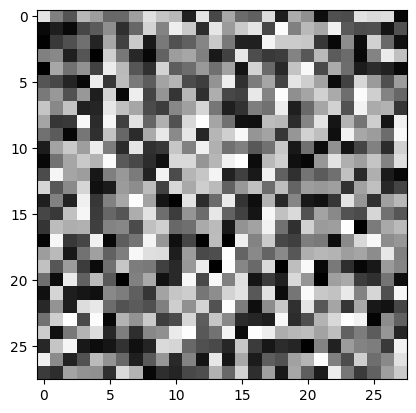

(5000, 784)
(5000, 1)


In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras 
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from PIL import Image as im

# Let's synthesize 20,000 images comprised of random pixel values.
train_images_random = np.random.random((5000, 28,28))
df = pd.DataFrame(train_images_random.reshape(-1)) #-1 is a wildcard; it'll guess what shape I want, and by default give a vector back.
print(f'Descriptive statistics for the training data:\n{df.describe()}\n')

# And let's make-up labels for them. 
train_labels_random = np.floor(np.random.random(5000)*10)
print(f'The first ten labels are {train_labels_random[:10]}\n')

# Here's what the first picture looks like.
plt.imshow(train_images_random[0],cmap=plt.cm.binary)
plt.show()

# Let's first convert each pixel matrix into a vector. 
train_images_random = train_images_random.reshape(5000,28*28)
train_labels_random = train_labels_random.reshape(5000,1)
print(train_images_random.shape)
print(train_labels_random.shape)

Now we will use the simulated data and fit a sequential Keras model that has 512 units in the first layer, with a Relu activation, and then the output layer. 

In [8]:
# Setup your model topology here using the Sequential API.
'''
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28*28,)),
    layers.Dense(10)
])
'''
model = keras.Sequential([
    layers.Dense(512, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

# Compile your model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit your model and store the training history in a variable (history) that you can query to plot the training loss, later. 
history = model.fit(train_images_random, train_labels_random, epochs=10, validation_split=0.2)


Epoch 1/10
125/125 [==============================] - 1s 4ms/step - loss: 2.3900 - accuracy: 0.1005 - val_loss: 2.3206 - val_accuracy: 0.1260
Epoch 2/10
125/125 [==============================] - 0s 3ms/step - loss: 2.2965 - accuracy: 0.1213 - val_loss: 2.3308 - val_accuracy: 0.0890
Epoch 3/10
125/125 [==============================] - 1s 4ms/step - loss: 2.2801 - accuracy: 0.1427 - val_loss: 2.3187 - val_accuracy: 0.0910
Epoch 4/10
125/125 [==============================] - 0s 3ms/step - loss: 2.2607 - accuracy: 0.1560 - val_loss: 2.3198 - val_accuracy: 0.1040
Epoch 5/10
125/125 [==============================] - 0s 3ms/step - loss: 2.2239 - accuracy: 0.1820 - val_loss: 2.3410 - val_accuracy: 0.1240
Epoch 6/10
125/125 [==============================] - 0s 3ms/step - loss: 2.1791 - accuracy: 0.2190 - val_loss: 2.3630 - val_accuracy: 0.1010
Epoch 7/10
125/125 [==============================] - 0s 3ms/step - loss: 2.1493 - accuracy: 0.2237 - val_loss: 2.3749 - val_accuracy: 0.0990
Epoch 

Okay, plot the training loss now... 

In [ ]:
# Call plot commands here. 
